In [1]:
from starling_rhythm.mfdfa import tmf
from starling_rhythm.utils.paths import PROCESSED_DIR

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bID = 's_b1555_22'

In [3]:
real_DIR = PROCESSED_DIR / bID / 'FULLtemplatingFalse-empirical'
real_wavs = list(real_DIR.glob('*.wav'))
fake_DIR = PROCESSED_DIR / bID / 'FULLtemplatingTrue-transition_gap_profiles'
fake_wavs = list(fake_DIR.glob('*.wav'))

In [20]:
real_wavs.sort()

In [21]:
fake_wavs.sort()

In [25]:
real_wavs

[PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingFalse-empirical/s_b1555_22_2022-09-20_08-00-01-01_115750_118750_FULLtemplatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingFalse-empirical/s_b1555_22_2022-09-20_08-00-01-01_843395_847050_FULLtemplatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingFalse-empirical/s_b1555_22_2022-09-20_08-00-01-02_1238880_1280705_FULLtemplatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingFalse-empirical/s_b1555_22_2022-09-20_08-00-01-02_1602030_1637260_FULLtemplatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingFalse-empirical/s_b1555_22_2022-09-20_09-00-01-01_1138035_1181490_FULLtemplatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FU

In [23]:
fake_wavs

[PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingTrue-transition_gap_profiles/s_b1555_22_2022-09-20_08-00-01-01_115750_118750_FULLtemplatingTrue-transition_gap_profiles_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingTrue-transition_gap_profiles/s_b1555_22_2022-09-20_08-00-01-01_843395_847050_FULLtemplatingTrue-transition_gap_profiles_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingTrue-transition_gap_profiles/s_b1555_22_2022-09-20_08-00-01-02_1238880_1280705_FULLtemplatingTrue-transition_gap_profiles_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingTrue-transition_gap_profiles/s_b1555_22_2022-09-20_08-00-01-02_1602030_1637260_FULLtemplatingTrue-transition_gap_profiles_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/FULLtemplatingTrue-transition_gap_profiles/s_b1555_22_2022-09-20_09-00-01-01_1138035_

In [4]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

In [5]:
n_jobs = 36
verbose = 0

In [6]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    real_ts = parallel(
        delayed(tmf)(
            address,
            amp_env_sr = 200
        )
        for address in tqdm(real_wavs, desc = 'real ones')
    )

real ones:  14%|█▍        | 144/1041 [03:33<26:47,  1.79s/it]/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
real ones: 100%|██████████| 1041/1041 [35:24<00:00,  2.04s/it]


In [7]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    fake_ts = parallel(
        delayed(tmf)(
            address,
            amp_env_sr = 200
        )
        for address in tqdm(fake_wavs, desc = 'real ones')
    )

real ones: 100%|██████████| 1041/1041 [35:46<00:00,  2.06s/it]


In [8]:
import pandas as pd
import numpy as np

In [9]:
real_df = pd.DataFrame(
    {
        'id': np.full(len(real_ts), 'real'),
        'ts': real_ts
    }
)
fake_df = pd.DataFrame(
    {
        'id': np.full(len(real_ts), 'fake'),
        'ts': fake_ts
    }
)

In [10]:
total_df = pd.concat([real_df, fake_df])

In [11]:
total_df = total_df.reset_index()

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='ts', ylabel='Count'>

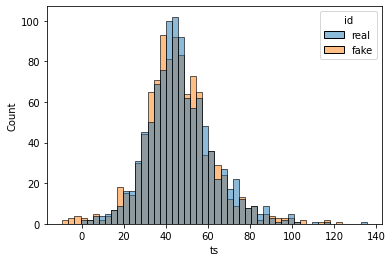

In [13]:
sns.histplot(data = total_df, x = "ts", hue = "id")

In [14]:
np.mean(real_ts)

47.098999076173826

In [15]:
np.mean(fake_ts)

45.88247919835259

In [16]:
import scipy.stats

In [17]:
scipy.stats.ttest_ind(real_ts, fake_ts)

Ttest_indResult(statistic=1.6731072558985973, pvalue=0.09445655685753132)